In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler

In [2]:
df_wine = pd.read_csv('wine.data', header=None)
df_wine.columns = ['Class label', 'Alcohol',
                    'Malic acid', 'Ash',
                    'Alcalinity of ash', 'Magnesium',
                    'Total phenols', 'Flavanoids',
                    'Nonflavanoid phenols',
                    'Proanthocyanins',
                    'Color intensity', 'Hue',
                    'OD280/OD315 of diluted wines',
                    'Proline']
print('Class labels', np.unique(df_wine['Class label']))


Class labels [1 2 3]


In [3]:
df_wine #.head()

,Class label,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


In [4]:
X, y = df_wine.iloc[:, 1:].values, df_wine.iloc[:, 0].values

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=0, stratify=y)

In [5]:
# min-max scaling (normalization)
mms = MinMaxScaler()
X_train_norm = mms.fit_transform(X_train) # equivalente to: mms.fit(X_train) and then X_train_norm = mms.transform(X_train)
X_test_norm = mms.transform(X_test)

In [6]:
# 0 mean, 1 std scaling (standarization) PREFERABLE
stdsc = StandardScaler()
X_train_std = stdsc.fit_transform(X_train) # equivalente to: stdsc.fit(X_train) and then X_train_std = stdsc.transform(X_train)
X_test_std = stdsc.transform(X_test)

In [7]:
# Feature selection with L1 regularization
from sklearn.linear_model import LogisticRegression


lr =LogisticRegression(penalty='l1',
                       C=1.0,
                       solver='liblinear',
                       multi_class='ovr')
lr.fit(X_train_std, y_train)
print('Training accuracy:', lr.score(X_train_std, y_train))
print('Test accuracy:', lr.score(X_test_std, y_test))


Training accuracy: 1.0
Test accuracy: 1.0


In [8]:
lr.coef_

array([[ 1.24640283,  0.1798947 ,  0.74601909, -1.16403399,  0.        ,
         0.        ,  1.15984186,  0.        ,  0.        ,  0.        ,
         0.        ,  0.5566172 ,  2.50867086],
       [-1.53658032, -0.38753379, -0.99530697,  0.36509914, -0.05954548,
         0.        ,  0.66842924,  0.        ,  0.        , -1.93422485,
         1.23379358,  0.        , -2.23236986],
       [ 0.13534315,  0.16989968,  0.35746924,  0.        ,  0.        ,
         0.        , -2.43443943,  0.        ,  0.        ,  1.56213135,
        -0.81636737, -0.49812099,  0.        ]])

In [9]:
abs(lr.coef_[0,:])+abs(lr.coef_[1,:])+abs(lr.coef_[2,:])

array([2.9183263 , 0.73732817, 2.09879531, 1.52913313, 0.05954548,
       0.        , 4.26271053, 0.        , 0.        , 3.49635619,
       2.05016094, 1.05473819, 4.74104072])

In [10]:
range(-4, 6)

range(-4, 6)

In [11]:
np.arange(-4.0, 6.0)

array([-4., -3., -2., -1.,  0.,  1.,  2.,  3.,  4.,  5.])

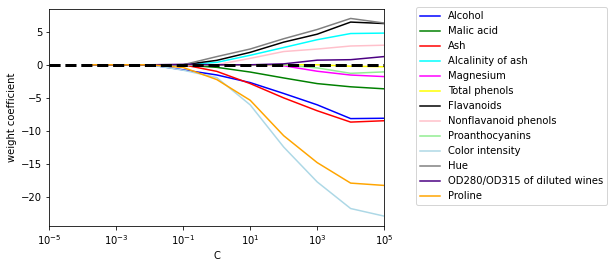

In [12]:
# Vary the regularization strength and plot the regularization path
import matplotlib.pyplot as plt
fig = plt.figure()
ax = plt.subplot(111) # equivalent to ax = plt.subplot(1, 1, 1) 
colors = ['blue', 'green', 'red', 'cyan',
          'magenta', 'yellow', 'black',
          'pink', 'lightgreen', 'lightblue',
          'gray', 'indigo', 'orange']
weights, params = [], []

for c in np.arange(-4.0, 6.0):
    lr = LogisticRegression(penalty='l1', C=10.**c,
                            solver='liblinear',
                            multi_class='ovr', random_state=0)
    lr.fit(X_train_std, y_train)
    weights.append(lr.coef_[1])
    params.append(10**c)

weights = np.array(weights)

for column, color in zip(range(weights.shape[1]), colors):
    plt.plot(params, weights[:,column],
             color=color,
             label=df_wine.columns[column+1])
plt.axhline(0, color='black', linestyle='--', linewidth=3)
plt.xlim([10**-5, 10**5])
plt.ylabel('weight coefficient')
plt.xlabel('C')    
plt.xscale('log')
plt.legend(loc='upper left')
ax.legend(loc='upper center',
          bbox_to_anchor=(1.38, 1.03),
          ncol=1, fancybox=True)
    

In [13]:
import sys
import os
sys.path.insert(0, os.path.abspath('../my_pkgs'))
from feature_pkg.feature_selection import SBS



sbs = SBS(lr, k_features=1)

13 features: Index(['Class label', 'Alcohol', 'Malic acid', 'Ash', 'Alcalinity of ash',
       'Magnesium', 'Total phenols', 'Flavanoids', 'Nonflavanoid phenols',
       'Proanthocyanins', 'Color intensity', 'Hue',
       'OD280/OD315 of diluted wines'],
      dtype='object'), 0.9032258064516129
12 features: Index(['Class label', 'Alcohol', 'Malic acid', 'Alcalinity of ash',
       'Magnesium', 'Total phenols', 'Flavanoids', 'Nonflavanoid phenols',
       'Proanthocyanins', 'Color intensity', 'Hue',
       'OD280/OD315 of diluted wines'],
      dtype='object'), 0.9354838709677419
11 features: Index(['Class label', 'Malic acid', 'Alcalinity of ash', 'Magnesium',
       'Total phenols', 'Flavanoids', 'Nonflavanoid phenols',
       'Proanthocyanins', 'Color intensity', 'Hue',
       'OD280/OD315 of diluted wines'],
      dtype='object'), 0.967741935483871
10 features: Index(['Class label', 'Malic acid', 'Alcalinity of ash', 'Magnesium',
       'Total phenols', 'Flavanoids', 'Nonflavanoid 

Index(['Alcohol', 'Ash'], dtype='object')

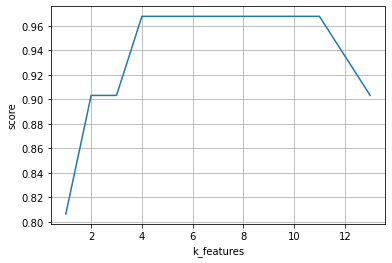

In [19]:
lr =LogisticRegression(penalty='l2',
                       C=1.0,
                       solver='liblinear',
                       multi_class='ovr')

sbs = SBS(lr, k_features=1)
sbs.fit(X_train, y_train)

subplot111 = plt.subplot(1,1,1)
subplot111.plot([len(k) for k in sbs.subsets_] , sbs.scores_)
subplot111.grid()
subplot111.set_xlabel("k_features")
subplot111.set_ylabel("score")

for subset, score in zip(sbs.subsets_, sbs.scores_):
    print(f"{len(subset)} features: {df_wine.columns[list(subset)]}, {score}")
    pass

df_wine.columns[list((1,3))]

 1) Proline                        0.185453
 2) Flavanoids                     0.174751
 3) Color intensity                0.143920
 4) OD280/OD315 of diluted wines   0.136162
 5) Alcohol                        0.118529
 6) Hue                            0.058739
 7) Total phenols                  0.050872
 8) Magnesium                      0.031357
 9) Malic acid                     0.025648
10) Proanthocyanins                0.025570
11) Alcalinity of ash              0.022366
12) Nonflavanoid phenols           0.013354
13) Ash                            0.013279


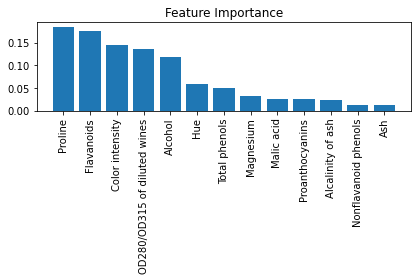

In [25]:
# importance of features from random forest
from sklearn.ensemble import RandomForestClassifier

feat_labels = df_wine.columns[1:]
forest = RandomForestClassifier(n_estimators=500,
                                random_state=1)
forest.fit(X_train, y_train)
importances = forest.feature_importances_
indices = np.argsort(importances)[::-1]

for f in range(X_train.shape[1]):
    print("%2d) %-*s %f" % 
          (f + 1, 30,feat_labels[indices[f]],importances[indices[f]]))

plt.title('Feature Importance')
plt.bar(range(X_train.shape[1]),
        importances[indices],
        align='center')
plt.xticks(range(X_train.shape[1]),
           feat_labels[indices], rotation=90)
plt.xlim([-1, X_train.shape[1]])
plt.tight_layout()
plt.show()

In [24]:
from sklearn.feature_selection import SelectFromModel
sfm = SelectFromModel(forest, threshold=0.1, prefit=True)
X_selected = sfm.transform(X_train)
print('Number of features that meet this threshold',
      'criterion:', X_selected.shape[1])

Number of features that meet this threshold criterion: 5
